In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import pairwise_distances_argmin

In [3]:
x = np.array([[1,2],[3.5,4],[0.2,1.7],[4,3.8],[9,3],[7,5.5],[4.3,7.1],[3,1],[6,9]]) 

In [8]:
def find_random_cluster(x,n_cluster,r_seed=2):
    random_state = np.random.RandomState(r_seed)
    print("random_state",random_state)
    i = random_state.permutation(x.shape[0])[:n_cluster]
    print("permutations = ",i)
    center = x[i]
    print("initial centroids = ",center)
    print("converting centroids = ")

    while True:
        label = pairwise_distances_argmin(x,center)
        print("labels = ",label)
        new_center = np.array([x[label == i].mean(0) for i in range(n_cluster)])
        print("updated centroids = ",new_center)

        if np.all(center == new_center):
            break
        center == new_center
        print("new center",center)
        return label,center

n_cluster = 2
label,center = find_random_cluster(x,n_cluster,r_seed=2)

random_state RandomState(MT19937)
permutations =  [4 1]
initial centroids =  [[9.  3. ]
 [3.5 4. ]]
converting centroids = 
labels =  [1 1 1 1 0 0 1 1 1]
updated centroids =  [[8.         4.25      ]
 [3.14285714 4.08571429]]
new center [[9.  3. ]
 [3.5 4. ]]


In [9]:
from sklearn import datasets

In [10]:
x,y = datasets.make_blobs(n_samples=4000,n_features=4,random_state=42)

In [11]:
df = pd.DataFrame(x,columns=['x0','x1','x2','x3'])
data = df.copy()
data['Target'] = y
data.head()

,x0,x1,x2,x3,Target
0,-7.283784,-6.878315,-8.720620,5.651762,1
1,-7.516472,-6.139093,-9.126478,7.473997,1
2,-7.378875,-8.753350,-9.288696,7.730371,1
3,-2.228188,6.881691,5.652516,1.815016,0
4,3.772067,2.602689,-10.723626,9.136409,2


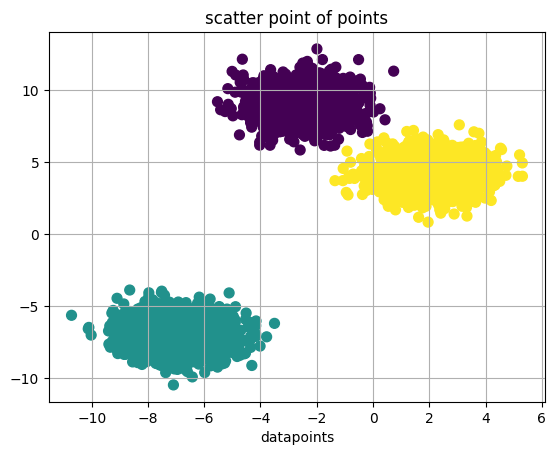

In [14]:
plt.title("scatter point of points")
plt.scatter(x[:,0],x[:,1],c=y,cmap='viridis',s = 50)
plt.grid(True)
plt.xlabel("datapoints")
plt.ylabel("")
plt.show()

In [27]:
n_cluster = 3
def kmeans(n_cluster,x,y,df):
    new = df.copy()
    random = np.random.RandomState(8)
    i = random.permutation(x.shape[0])[:n_cluster]
    centroid = x[i]
    print("initial cluster = ",centroid)
    plt.title("initial centroids ")
    plt.scatter(x[:,0],x[:,1],c=y,cmap='viridis',s = 50)
    plt.scatter(centroid[:,0],centroid[:,1],s = 50,marker="x",c = 'pink',label='centroid')
    plt.xlabel('dataset')
    plt.ylabel('')
    plt.legend()
    
    plt.text(centroid[0][0]-2,centroid[0][1]+0.5,centroid[0],color = 'orange')
    plt.text(centroid[1][0]-2,centroid[1][1]+0.5,centroid[1],color = 'black')
    plt.text(centroid[2][0]-2,centroid[2][1]+0.5,centroid[2],color = 'red')

    plt.show()
    j = 1
    while True:
        labels = pairwise_distances_argmin(x,centroid)
        new_center = np.array([x[labels==i].mean(0) for i in range(n_cluster)])
        print("updated centroids = ",str(j),new_center)
        if np.all(centroid == new_center):
            break
        centroid = new_center
        new['labels'+str(j)]=labels
        plt.title("updated"+str(j))
        plt.scatter(x[:,0],x[:,1],c=y,cmap='viridis',s = 50)
        plt.scatter(centroid[:,0],centroid[:,1],s = 50,marker="x",c = 'pink',label='centroid')
        plt.xlabel('dataset')
        plt.ylabel('')
        plt.show()
        j = j+1
    return new


initial cluster =  [[  1.38215373   4.66946385 -10.30150242   9.62450125]
 [ -3.55610861   9.55093888   5.82558299   2.69212299]
 [ -6.24640188  -7.26773943 -10.77329187   7.17416142]]


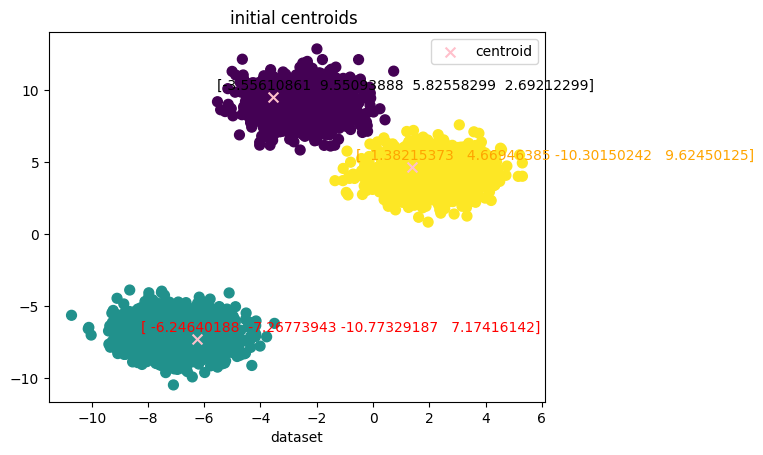

updated centroids =  1 [[ 2.05360708  4.19232827 -9.60239564  9.39357851]
 [-2.47372319  9.01793285  4.59965683  1.99431611]
 [-6.88262168 -6.92180488 -8.84545576  7.32815304]]


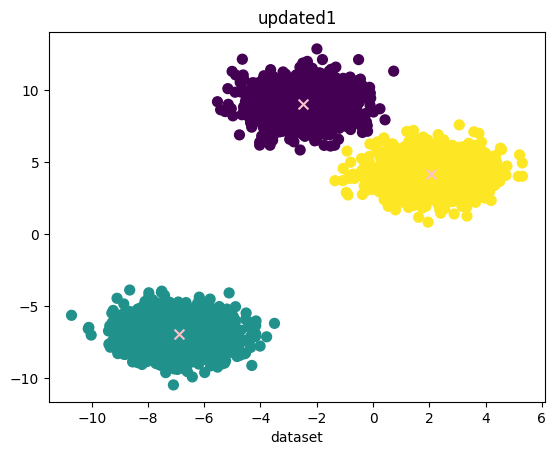

updated centroids =  2 [[ 2.05360708  4.19232827 -9.60239564  9.39357851]
 [-2.47372319  9.01793285  4.59965683  1.99431611]
 [-6.88262168 -6.92180488 -8.84545576  7.32815304]]


,x0,x1,x2,x3,labels1
0,-7.283784,-6.878315,-8.720620,5.651762,2
1,-7.516472,-6.139093,-9.126478,7.473997,2
2,-7.378875,-8.753350,-9.288696,7.730371,2
3,-2.228188,6.881691,5.652516,1.815016,1
4,3.772067,2.602689,-10.723626,9.136409,0
...,...,...,...,...,...
3995,-1.537141,9.000981,4.040057,0.414383,1
3996,-7.780076,-5.460654,-9.753805,7.449982,2
3997,-3.574311,8.709061,4.030367,1.786198,1
3998,1.478026,3.083708,-10.392672,9.623985,0


In [28]:
kmeans(3,x,y,df)

In [32]:
from sklearn.cluster import KMeans

In [30]:
from sklearn.metrics import silhouette_score,accuracy_score,r2_score

In [33]:
k = KMeans(n_clusters=3,random_state=42)

In [34]:
k.fit(df)

KMeans(n_clusters=3, random_state=42)

In [35]:
y_pred = k.predict(df)

In [36]:
silhouette_score(df,y_pred)

0.8268973148390489

In [37]:
kmeans = k.cluster_centers_

In [38]:
print(kmeans)

[[ 2.05360708  4.19232827 -9.60239564  9.39357851]
 [-2.47372319  9.01793285  4.59965683  1.99431611]
 [-6.88262168 -6.92180488 -8.84545576  7.32815304]]


C:\Users\admin\AppData\Local\Temp\ipykernel_14320\2838501928.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(kmeans[:,0],kmeans[:,1],cmap='pink',s=50,marker="*")


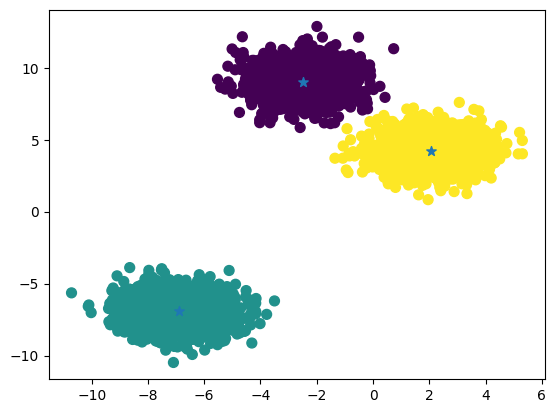

In [47]:
plt.scatter(x[:,0],x[:,1],c=y,cmap='viridis',s=50)
plt.scatter(kmeans[:,0],kmeans[:,1],cmap='pink',s=50,marker="*")
plt.show()